# Clustering based on the songs features:

This jupyter notebook shows the process of clustering based on the song's features for the project's visualization and analysis. For clustering the dataset, it was used the algorithm K-Means Clustering Algorithm.

This code was written by [Sylvester Cardorelle](https://github.com/SylCard/Spotify-Emotions-Project). However, I edited it according to this project. 

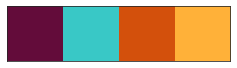

In [66]:
# To support both python 2 and python 3
from __future__ import division, print_function, unicode_literals

import numpy as np
import os
import pandas as pd
# To make this notebook's output stable across runs
np.random.seed(42)

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

import seaborn as sns
#set style of plots
sns.set_style('white')

#define a custom palette
customPalette = ['#630C3A', '#39C8C6', '#D3500C', '#FFB139']
sns.set_palette(customPalette)
sns.palplot(customPalette)


# Ignore useless warnings (see SciPy issue #5998)
import warnings
warnings.filterwarnings(action="ignore", message="^internal gelsd")

## Preparing the dataset

In [67]:
# Import my final dataset in csv file
songs = pd.read_csv("Thesis Dataset Final csv.csv")

songs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5964 entries, 0 to 5963
Data columns (total 23 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   id                5964 non-null   object 
 1   embed_link        5964 non-null   object 
 2   title             5964 non-null   object 
 3   uri               5964 non-null   object 
 4   all_artists       5964 non-null   object 
 5   artists_id        5964 non-null   object 
 6   artists_uri       5964 non-null   object 
 7   genres            5964 non-null   object 
 8   popularity        5964 non-null   int64  
 9   release_date      5964 non-null   object 
 10  danceability      5964 non-null   float64
 11  energy            5964 non-null   float64
 12  key               5964 non-null   int64  
 13  loudness          5964 non-null   float64
 14  mode              5964 non-null   int64  
 15  acousticness      5964 non-null   float64
 16  instrumentalness  5964 non-null   float64


In [68]:
#In this step I dropped the duration_ms , time_signature and popularity data. I did not considered them into the clustering since that they are not relevant features for this project.

songs = songs.drop(['duration_ms','time_signature','popularity'],axis=1)
songs.head()

,id,embed_link,title,uri,all_artists,artists_id,artists_uri,genres,release_date,danceability,energy,key,loudness,mode,acousticness,instrumentalness,liveness,valence,speechiness,tempo
0,7L3CKqmwOlGY46XsPhGYrF,https://embed.spotify.com?uri=spotify%3Atrack%...,"Cloud Atlas - Sextet (From ""Cloud Atlas"") - Pi...",spotify:track:7L3CKqmwOlGY46XsPhGYrF,Jonas Kvarnström,4qZrlSJ1sikAjQS9rrBBpx,spotify:artist:4qZrlSJ1sikAjQS9rrBBpx,film score,07/05/2015,0.198,0.0668,0,-18.354,1,0.97500,0.895000,0.0593,0.0865,0.0355,75.020
1,7L3CKqmwOlGY46XsPhGYrF,https://embed.spotify.com?uri=spotify%3Atrack%...,"Cloud Atlas - Sextet (From ""Cloud Atlas"") - Pi...",spotify:track:7L3CKqmwOlGY46XsPhGYrF,Jonas Kvarnström,4qZrlSJ1sikAjQS9rrBBpx,spotify:artist:4qZrlSJ1sikAjQS9rrBBpx,film score,07/05/2015,0.198,0.0668,0,-18.354,1,0.97500,0.895000,0.0593,0.0865,0.0355,75.020
2,0kEZlJh4mK1QRfb3CT5LPk,https://embed.spotify.com?uri=spotify%3Atrack%...,Kill Yourself (Part III),spotify:track:0kEZlJh4mK1QRfb3CT5LPk,$uicideboy$,1VPmR4DJC1PlOtd0IADAO0,spotify:artist:1VPmR4DJC1PlOtd0IADAO0,emo,21/09/2015,0.753,0.6800,5,-7.092,0,0.32600,0.000041,0.4230,0.1920,0.0349,105.977
3,6QFQqqYye5lAcnhCALvxKJ,https://embed.spotify.com?uri=spotify%3Atrack%...,My Flaws Burn Through My Skin Like Demonic Fla...,spotify:track:6QFQqqYye5lAcnhCALvxKJ,$uicideboy$,1VPmR4DJC1PlOtd0IADAO0,spotify:artist:1VPmR4DJC1PlOtd0IADAO0,emo,01/08/2015,0.780,0.7480,11,-7.394,0,0.00448,0.000546,0.1150,0.0663,0.0352,125.980
4,3Pe5Pcw5BTwI6NWe00QdVy,https://embed.spotify.com?uri=spotify%3Atrack%...,Para Mi Amor,spotify:track:3Pe5Pcw5BTwI6NWe00QdVy,10stack,2cFUpST5z9ZKyYTwg90eq5,spotify:artist:2cFUpST5z9ZKyYTwg90eq5,hip-hop,31/10/2018,0.633,0.3770,3,-14.975,0,0.76100,0.804000,0.2870,0.3880,0.0842,119.822


In [64]:
# grabbing the songs features
songs.describe()

,danceability,energy,key,loudness,mode,acousticness,instrumentalness,liveness,valence,speechiness,tempo,label
count,5964.000000,5964.000000,5964.000000,5964.000000,5964.000000,5964.000000,5964.000000,5964.000000,5964.000000,5964.000000,5964.000000,5964.000000
mean,0.448941,0.312507,0.449652,0.696182,0.699698,0.693735,0.395614,0.147986,0.286948,0.049318,0.515984,1.898893
std,0.177533,0.236908,0.312993,0.176637,0.458428,0.339493,0.415718,0.109708,0.219711,0.042125,0.148314,1.531273
min,0.000000,0.000231,0.000000,0.000000,0.000000,0.000006,0.000000,0.021900,0.000000,0.000000,0.000000,0.000000
25%,0.313750,0.113000,0.181818,0.586830,0.000000,0.441000,0.000132,0.094300,0.110000,0.033500,0.393467,0.000000
50%,0.451000,0.268000,0.454545,0.736218,1.000000,0.863000,0.142000,0.110000,0.228000,0.038900,0.509397,2.000000
75%,0.576000,0.479000,0.727273,0.837127,1.000000,0.972000,0.887000,0.147000,0.410000,0.048200,0.614673,3.000000
max,0.957000,0.986000,1.000000,1.000000,1.000000,0.996000,0.983000,0.962000,0.975000,0.945000,1.000000,4.000000


Normalising the Loudness, Tempo and Key:

> "Before feeding the data to any ML algorithms, I had to make sure that the features were correctly scaled. Typically ML algorithms do not perform well when numerical attributes are operating at very different scales, as it introduces bias to their objective functions" - [Sylvester Cardorelle](https://github.com/SylCard/Spotify-Emotions-Project)

- Loudness feature is from -60db to 0
- Tempo feature is in BPM
- Key value is >= -1 <= 11

In this sense, I normalised this features between 0 and 1 because most of the features provided from Spotify API are measured between 1 and 0.


array([[<AxesSubplot:title={'center':'danceability'}>,
        <AxesSubplot:title={'center':'energy'}>,
        <AxesSubplot:title={'center':'key'}>],
       [<AxesSubplot:title={'center':'loudness'}>,
        <AxesSubplot:title={'center':'mode'}>,
        <AxesSubplot:title={'center':'acousticness'}>],
       [<AxesSubplot:title={'center':'instrumentalness'}>,
        <AxesSubplot:title={'center':'liveness'}>,
        <AxesSubplot:title={'center':'valence'}>],
       [<AxesSubplot:title={'center':'speechiness'}>,
        <AxesSubplot:title={'center':'tempo'}>, <AxesSubplot:>]],
      dtype=object)

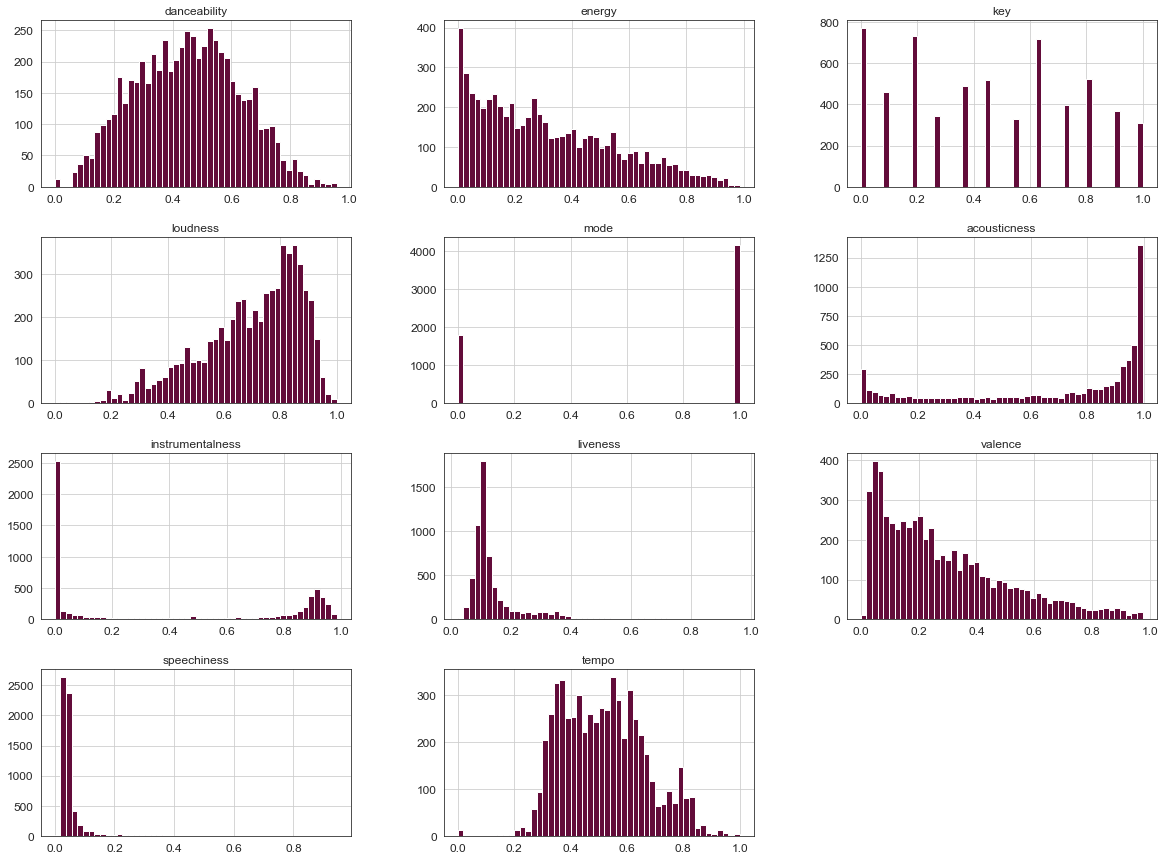

In [11]:
from sklearn import preprocessing

loudness = songs[['loudness']].values
min_max_scaler = preprocessing.MinMaxScaler()
loudness_scaled = min_max_scaler.fit_transform(loudness)
songs['loudness'] = pd.DataFrame(loudness_scaled)

tempo = songs[['tempo']].values
min_max_scaler = preprocessing.MinMaxScaler()
tempo_scaled = min_max_scaler.fit_transform(tempo)
songs['tempo'] = pd.DataFrame(tempo_scaled)

key = songs[['key']].values
min_max_scaler = preprocessing.MinMaxScaler()
key_scaled = min_max_scaler.fit_transform(key)
songs['key'] = pd.DataFrame(key_scaled)

songs.hist(bins=50,figsize=(20,15))

array([[<AxesSubplot:xlabel='danceability', ylabel='danceability'>,
        <AxesSubplot:xlabel='energy', ylabel='danceability'>,
        <AxesSubplot:xlabel='loudness', ylabel='danceability'>,
        <AxesSubplot:xlabel='speechiness', ylabel='danceability'>,
        <AxesSubplot:xlabel='acousticness', ylabel='danceability'>,
        <AxesSubplot:xlabel='tempo', ylabel='danceability'>,
        <AxesSubplot:xlabel='liveness', ylabel='danceability'>,
        <AxesSubplot:xlabel='valence', ylabel='danceability'>,
        <AxesSubplot:xlabel='key', ylabel='danceability'>,
        <AxesSubplot:xlabel='mode', ylabel='danceability'>,
        <AxesSubplot:xlabel='instrumentalness', ylabel='danceability'>],
       [<AxesSubplot:xlabel='danceability', ylabel='energy'>,
        <AxesSubplot:xlabel='energy', ylabel='energy'>,
        <AxesSubplot:xlabel='loudness', ylabel='energy'>,
        <AxesSubplot:xlabel='speechiness', ylabel='energy'>,
        <AxesSubplot:xlabel='acousticness', ylabel='en

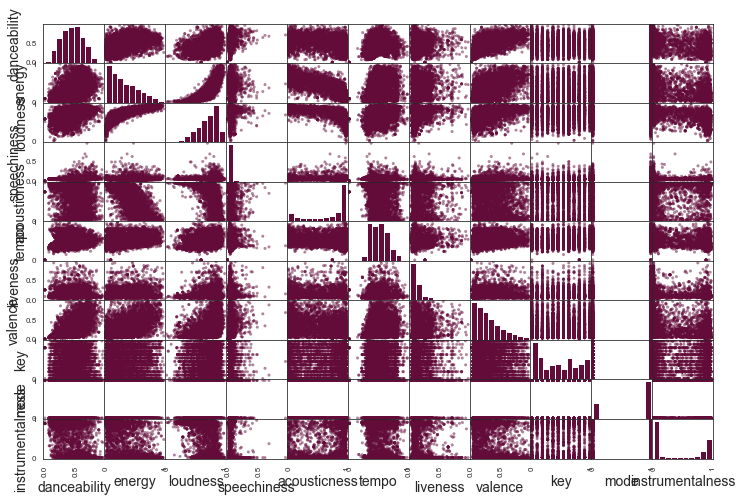

In [12]:
from pandas.plotting import scatter_matrix
# attributes that were taking into account to compare
attr = ['danceability','energy','loudness','speechiness','acousticness','tempo','liveness','valence','key','mode','instrumentalness']
scatter_matrix(songs[attr],figsize=(12,8))

In [13]:
# removing song names, artist, id, uris, embed link, genres and release date columns before clustering
songs_features = songs.copy()
songs_features = songs_features.drop(['id','title', 'embed_link', 'uri', 'all_artists', 'artists_id', 'artists_uri', 'genres',  'release_date'],axis=1)

## Clustering the songs

> "K-Means Clustering Algorithm is great at finding underlying distributions in data. It is an unsupervised learning algorithm which has one aim: Group similar data points into k groups and discover underlying patterns. To achieve that aim it looks for a predefined number (k) of clusters." - [Sylvester Cardorelle](https://github.com/SylCard/Spotify-Emotions-Project)

In [17]:
from sklearn.cluster import KMeans

Sum_of_squared_distances = []
K = range(1,15)
for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(songs_features)
    Sum_of_squared_distances.append(km.inertia_)

In [18]:
from sklearn.metrics import silhouette_score
for n_clusters in range(2,15):
    clusterer = KMeans (n_clusters=n_clusters)
    preds = clusterer.fit_predict(songs_features)
    centers = clusterer.cluster_centers_

    score = silhouette_score (songs_features, preds, metric='euclidean')
    print ("For n_clusters = {}, silhouette score is {})".format(n_clusters, score))

For n_clusters = 2, silhouette score is 0.2869617297674429)
For n_clusters = 3, silhouette score is 0.31287390438871615)
For n_clusters = 4, silhouette score is 0.33734348710488465)
For n_clusters = 5, silhouette score is 0.3226382455292726)
For n_clusters = 6, silhouette score is 0.3163444896858802)
For n_clusters = 7, silhouette score is 0.29302108849880143)
For n_clusters = 8, silhouette score is 0.26319180495046207)
For n_clusters = 9, silhouette score is 0.25647928785444446)
For n_clusters = 10, silhouette score is 0.2404532591655684)
For n_clusters = 11, silhouette score is 0.2589300596761108)
For n_clusters = 12, silhouette score is 0.24387858580511923)
For n_clusters = 13, silhouette score is 0.23804182125535775)
For n_clusters = 14, silhouette score is 0.2278209061863069)


## Deciding the optimal number of clusters (k): Elbow Method
>"The Elbow Method involves running K-Means for a range of k (e.g. 1–15) and plotting the average sum of squares distance to cluster centre vs the number of clusters to find a visual “elbow”, which is the optimal number of clusters" [Sylvester Cardorelle](https://github.com/SylCard/Spotify-Emotions-Project)

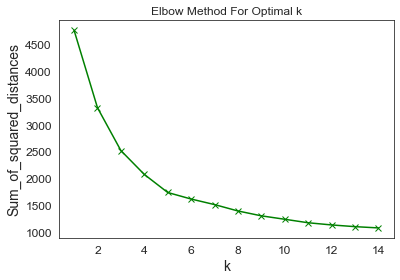

In [10]:
plt.plot(K, Sum_of_squared_distances, 'gx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.show()

With this method I got the right number of cluster. 

> When k = 5 "the average squared distance to cluster centre starts to trail off significantly. This is the long awaited elbow, the optimal k" - [Sylvester Cardorelle](https://github.com/SylCard/Spotify-Emotions-Project)
## K = 5

## Visualising the Clusters using PCA & t-SNE

> "We’re dealing with high dimensional data, which means it’s pretty hard to imagine. Thankfully, we can use dimensionality reduction techniques to reduce the dimensions of our data, making it easier to visualise whilst retaining most of the information held within the data (e.g. variance). I used two dimensionality reduction algorithms, Principal component analysis (PCA) and t-Distributed Stochastic Neighbour Embedding (t-SNE) to visualise the clusters" [Sylvester Cardorelle](https://github.com/SylCard/Spotify-Emotions-Project)

In [19]:
kmeans = KMeans(n_clusters=5)
kmeans.fit(songs_features)

KMeans(n_clusters=5)

In [20]:
# PCA to reduce our data to 2 dimensions for visualisation
from sklearn.decomposition import PCA
y_kmeans = kmeans.predict(songs_features)
pca = PCA(n_components=2)
principal_components = pca.fit_transform(songs_features)

C:\Users\drive\anaconda3\lib\site-packages\seaborn\regression.py:592: UserWarning: legend_out is deprecated from the `lmplot` function signature. Please update your code to pass it using `facet_kws`.
  warnings.warn(msg, UserWarning)


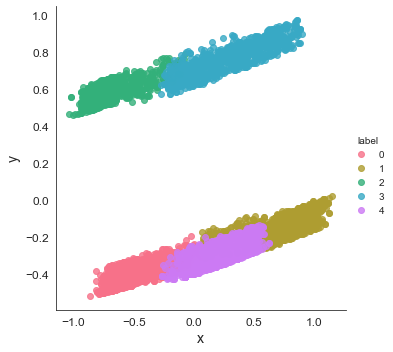

In [21]:
pc = pd.DataFrame(principal_components)
pc['label'] = y_kmeans
pc.columns = ['x', 'y','label']

#plot data with seaborn
cluster = sns.lmplot(data=pc, x='x', y='y', hue='label', 
                   fit_reg=False, legend=True, legend_out=True)


In [22]:
from sklearn.manifold import TSNE #T-Distributed Stochastic Neighbor Embedding
#T-SNE with two dimensions
tsne = TSNE(n_components=2, perplexity=50)

tsne_components = tsne.fit_transform(songs_features)

C:\Users\drive\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
C:\Users\drive\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


C:\Users\drive\anaconda3\lib\site-packages\seaborn\regression.py:592: UserWarning: legend_out is deprecated from the `lmplot` function signature. Please update your code to pass it using `facet_kws`.
  warnings.warn(msg, UserWarning)


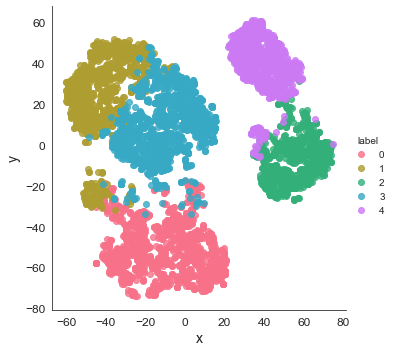

In [15]:
ts = pd.DataFrame(tsne_components)
ts['label'] = y_kmeans
ts.columns = ['x', 'y','label']

#plot data with seaborn
cluster = sns.lmplot(data=ts, x='x', y='y', hue='label', 
                   fit_reg=False, legend=True, legend_out=True)

# Exploring each of the 5 clusters and exporting them into csv files

Number of songs per cluster:

In [23]:
songs['label'] = y_kmeans

# shuffle dataset

songs = songs.sample(frac=1)
songs['label'].value_counts()

0    1575
4    1419
1    1179
2     903
3     888
Name: label, dtype: int64

# Cluster # 0

array([[<AxesSubplot:title={'center':'danceability'}>,
        <AxesSubplot:title={'center':'energy'}>,
        <AxesSubplot:title={'center':'key'}>],
       [<AxesSubplot:title={'center':'loudness'}>,
        <AxesSubplot:title={'center':'mode'}>,
        <AxesSubplot:title={'center':'acousticness'}>],
       [<AxesSubplot:title={'center':'instrumentalness'}>,
        <AxesSubplot:title={'center':'liveness'}>,
        <AxesSubplot:title={'center':'valence'}>],
       [<AxesSubplot:title={'center':'speechiness'}>,
        <AxesSubplot:title={'center':'tempo'}>,
        <AxesSubplot:title={'center':'label'}>]], dtype=object)

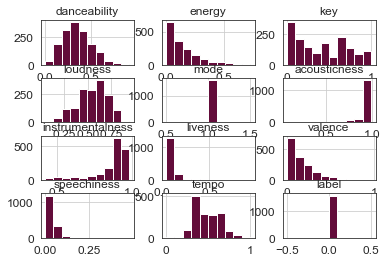

In [63]:
# visualizing the features
songs[songs['label']==0].hist()

In [45]:
# checking the cluster data
songs[songs['label'] == 0].head(10)

,id,embed_link,title,uri,all_artists,artists_id,artists_uri,genres,release_date,danceability,...,key,loudness,mode,acousticness,instrumentalness,liveness,valence,speechiness,tempo,label
288,3sAYxq1986j3ydqLv6jwUJ,https://embed.spotify.com?uri=spotify%3Atrack%...,"Serenade for Strings in E Major, Op. 22, B. 52...",spotify:track:3sAYxq1986j3ydqLv6jwUJ,Antonín Dvořák,3X4vtZfo29CzvenatIDhf1,spotify:artist:3X4vtZfo29CzvenatIDhf1,classical music,01/01/1991,0.000,...,0.818182,0.594167,1,0.755,0.889,0.2620,0.0000,0.0000,0.000000,0
4451,4sHUs1hEro8GHI3tbyse4B,https://embed.spotify.com?uri=spotify%3Atrack%...,"The Sleeping Beauty (Suite), Op. 66a, TH. 234:...",spotify:track:4sHUs1hEro8GHI3tbyse4B,Pyotr Ilyich Tchaikovsky,50hiYMhi0g77BOkkQ4zebB,spotify:artist:50hiYMhi0g77BOkkQ4zebB,orchestral performance,01/01/1996,0.171,...,0.636364,0.307597,1,0.963,0.950,0.0866,0.1900,0.0409,0.597749,0
1110,086sjLPEqdKBgTxbTeCLCv,https://embed.spotify.com?uri=spotify%3Atrack%...,"Rêverie, L. 68",spotify:track:086sjLPEqdKBgTxbTeCLCv,Claude Debussy,2T5bM1nb5fZVw5Bm851HNh,spotify:artist:2T5bM1nb5fZVw5Bm851HNh,classical music,31/07/2007,0.250,...,0.454545,0.314866,1,0.995,0.922,0.0779,0.0830,0.0410,0.289449,0
3559,6FYYsWqAXGzqJtyrqTXESD,https://embed.spotify.com?uri=spotify%3Atrack%...,Debussy - Claire De Lune,spotify:track:6FYYsWqAXGzqJtyrqTXESD,Martin Bloch,2WJ5Jh2DxFhkyA3xRoq77z,spotify:artist:2WJ5Jh2DxFhkyA3xRoq77z,classic music,15/12/2013,0.313,...,0.090909,0.439203,1,0.992,0.899,0.0982,0.0390,0.0429,0.344399,0
4779,4ObQ0m7VUtrgdEwpFeCKua,https://embed.spotify.com?uri=spotify%3Atrack%...,"12 Songs, Op. 21: V. Lilacs (Transcr. Rachmani...",spotify:track:4ObQ0m7VUtrgdEwpFeCKua,"Sergei Rachmaninoff, Sergei Babayan",79gBfLMlUJNdcXv1nc33oK,spotify:artist:79gBfLMlUJNdcXv1nc33oK,classical music,07/08/2020,0.168,...,0.727273,0.209088,1,0.995,0.920,0.0680,0.0705,0.0404,0.361195,0
3617,5UbnuRgMvmJXNfVQwtnMeJ,https://embed.spotify.com?uri=spotify%3Atrack%...,Smile,spotify:track:5UbnuRgMvmJXNfVQwtnMeJ,Maurice Font,6yQ1L2SHtnSTXctzGsKsPC,spotify:artist:6yQ1L2SHtnSTXctzGsKsPC,background jazz,23/03/2021,0.504,...,0.272727,0.512388,1,0.987,0.948,0.1120,0.0761,0.0448,0.330570,0
2880,6zqK3fE8uCRLpZLUj9VGci,https://embed.spotify.com?uri=spotify%3Atrack%...,"Peer Pressure - From ""Eternal Sunshine of the ...",spotify:track:6zqK3fE8uCRLpZLUj9VGci,Jon Brion,57YJQe0ayvIaRZJ3PW5nFP,spotify:artist:57YJQe0ayvIaRZJ3PW5nFP,film score,01/01/2004,0.229,...,0.363636,0.540935,1,0.939,0.920,0.1060,0.2570,0.0374,0.314784,0
4028,7qH9Z4dJEN0l9bidizW7fq,https://embed.spotify.com?uri=spotify%3Atrack%...,Anchor,spotify:track:7qH9Z4dJEN0l9bidizW7fq,Novo Amor,0rZp7G3gIH6WkyeXbrZnGi,spotify:artist:0rZp7G3gIH6WkyeXbrZnGi,indie folk,26/05/2017,0.457,...,0.818182,0.775233,1,0.805,0.884,0.1260,0.1260,0.0308,0.541739,0
385,2IRHgyu1TuadH98fgUChCM,https://embed.spotify.com?uri=spotify%3Atrack%...,Pick Me Up,spotify:track:2IRHgyu1TuadH98fgUChCM,"Aso, Aviino, Middle School",6AjXxPL8C44rc1yJdi6RZB,spotify:artist:6AjXxPL8C44rc1yJdi6RZB,lofi hip-hop,03/06/2020,0.766,...,0.000000,0.592156,1,0.859,0.955,0.1080,0.3460,0.1040,0.352073,0
2668,0qMhdJjFV0VVu7atzy3VXd,https://embed.spotify.com?uri=spotify%3Atrack%...,I Left My Heart In San Francisco,spotify:track:0qMhdJjFV0VVu7atzy3VXd,Jim Jensen,1mzZZuAmYl9ZyBmrI0beiJ,spotify:artist:1mzZZuAmYl9ZyBmrI0beiJ,piano music,30/12/2021,0.355,...,0.909091,0.438951,1,0.990,0.935,0.1070,0.1040,0.0344,0.410915,0


In [48]:
# exporting the cluster into a csv file
songs[songs['label'] == 0].to_csv("Cluster 0.csv", index = False)

# Cluster # 1

array([[<AxesSubplot:title={'center':'danceability'}>,
        <AxesSubplot:title={'center':'energy'}>,
        <AxesSubplot:title={'center':'key'}>],
       [<AxesSubplot:title={'center':'loudness'}>,
        <AxesSubplot:title={'center':'mode'}>,
        <AxesSubplot:title={'center':'acousticness'}>],
       [<AxesSubplot:title={'center':'instrumentalness'}>,
        <AxesSubplot:title={'center':'liveness'}>,
        <AxesSubplot:title={'center':'valence'}>],
       [<AxesSubplot:title={'center':'speechiness'}>,
        <AxesSubplot:title={'center':'tempo'}>,
        <AxesSubplot:title={'center':'label'}>]], dtype=object)

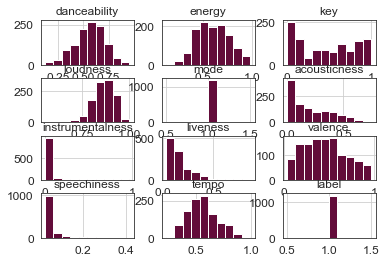

In [49]:
# visualizing the features
songs[songs['label']==1].hist()

In [51]:
# checking the cluster data
songs[songs['label'] == 1].head(10)

,id,embed_link,title,uri,all_artists,artists_id,artists_uri,genres,release_date,danceability,...,key,loudness,mode,acousticness,instrumentalness,liveness,valence,speechiness,tempo,label
2838,0oiCeOPwm4zhwfyIpAE37y,https://embed.spotify.com?uri=spotify%3Atrack%...,Love on the Weekend,spotify:track:0oiCeOPwm4zhwfyIpAE37y,John Mayer,0hEurMDQu99nJRq8pTxO14,spotify:artist:0hEurMDQu99nJRq8pTxO14,acoustic,14/04/2017,0.718,...,0.636364,0.857309,1,0.62300,0.000681,0.0612,0.422,0.0288,0.555244,1
5190,40dJCw4xU6Bd5ie9rfagNo,https://embed.spotify.com?uri=spotify%3Atrack%...,Everybody Wants To Rule The World,spotify:track:40dJCw4xU6Bd5ie9rfagNo,Tears For Fears,4bthk9UfsYUYdcFyqxmSUU,spotify:artist:4bthk9UfsYUYdcFyqxmSUU,rock,25/02/1985,0.637,...,0.636364,0.778204,1,0.36300,0.004510,0.1070,0.552,0.0583,0.518598,1
2210,07Tq5rrAN2zBqsFhZ8PL26,https://embed.spotify.com?uri=spotify%3Atrack%...,In Bloom,spotify:track:07Tq5rrAN2zBqsFhZ8PL26,Hand Made House,14AkFgEnEXiCAc0DL9Wjvn,spotify:artist:14AkFgEnEXiCAc0DL9Wjvn,indie rock,28/06/2019,0.776,...,0.363636,0.853652,1,0.01750,0.054300,0.1030,0.407,0.0476,0.648043,1
5078,6e9neXGyujjE4TDUMMLY5d,https://embed.spotify.com?uri=spotify%3Atrack%...,Floating,spotify:track:6e9neXGyujjE4TDUMMLY5d,Tay Oskee,6oqDqZlET7T3JO9YWD2pVW,spotify:artist:6oqDqZlET7T3JO9YWD2pVW,indie folk,06/12/2019,0.686,...,0.727273,0.759280,1,0.52900,0.008540,0.1070,0.271,0.0795,0.458289,1
720,6pXe0HxGT1xufKGhZYqweC,https://embed.spotify.com?uri=spotify%3Atrack%...,honey,spotify:track:6pXe0HxGT1xufKGhZYqweC,boy pablo,7wbkl3zgDZEoZer357mVIw,spotify:artist:7wbkl3zgDZEoZer357mVIw,indie pop,23/10/2020,0.656,...,0.000000,0.805266,1,0.30400,0.074000,0.1350,0.715,0.0339,0.666620,1
1033,7LX4aXtvImhdgUHQBlo8Kp,https://embed.spotify.com?uri=spotify%3Atrack%...,K.,spotify:track:7LX4aXtvImhdgUHQBlo8Kp,Cigarettes After Sex,1QAJqy2dA3ihHBFIHRphZj,spotify:artist:1QAJqy2dA3ihHBFIHRphZj,dream pop,09/06/2017,0.454,...,0.272727,0.803003,1,0.14600,0.819000,0.1410,0.313,0.0270,0.435569,1
52,6alwI2bIBoo9t3ENdOFEUK,https://embed.spotify.com?uri=spotify%3Atrack%...,Honeysuckle,spotify:track:6alwI2bIBoo9t3ENdOFEUK,Addison Grace,39EIRTZx1JjfeDLVdbj2ap,spotify:artist:39EIRTZx1JjfeDLVdbj2ap,indie pop,29/01/2021,0.474,...,0.181818,0.798272,1,0.31800,0.005580,0.1410,0.402,0.0283,0.693899,1
4581,2IVsRhKrx8hlQBOWy4qebo,https://embed.spotify.com?uri=spotify%3Atrack%...,Mr Loverman,spotify:track:2IVsRhKrx8hlQBOWy4qebo,Ricky Montgomery,0ZUvK7zGdXLd78mQr3t1Tw,spotify:artist:0ZUvK7zGdXLd78mQr3t1Tw,indie pop,08/04/2016,0.639,...,0.000000,0.884440,1,0.24500,0.000024,0.2500,0.488,0.0256,0.601812,1
4376,0KzAbK6nItSqNh8q70tb0K,https://embed.spotify.com?uri=spotify%3Atrack%...,Where Is My Mind?,spotify:track:0KzAbK6nItSqNh8q70tb0K,Pixies,6zvul52xwTWzilBZl6BUbT,spotify:artist:6zvul52xwTWzilBZl6BUbT,alternative rock,06/10/1997,0.513,...,0.363636,0.728287,1,0.00731,0.000838,0.0878,0.243,0.0343,0.375811,1
3327,6K8VQ84MqhsoakN5MjrnVR,https://embed.spotify.com?uri=spotify%3Atrack%...,Supercut,spotify:track:6K8VQ84MqhsoakN5MjrnVR,Lorde,163tK9Wjr9P9DmM0AVK7lm,spotify:artist:163tK9Wjr9P9DmM0AVK7lm,indie pop,16/06/2017,0.562,...,0.000000,0.803712,1,0.21900,0.000022,0.0806,0.150,0.0520,0.577834,1


In [52]:
# exporting the cluster into a csv file
songs[songs['label'] == 1].to_csv("Cluster 1.csv", index = False)

# Cluster # 2

array([[<AxesSubplot:title={'center':'danceability'}>,
        <AxesSubplot:title={'center':'energy'}>,
        <AxesSubplot:title={'center':'key'}>],
       [<AxesSubplot:title={'center':'loudness'}>,
        <AxesSubplot:title={'center':'mode'}>,
        <AxesSubplot:title={'center':'acousticness'}>],
       [<AxesSubplot:title={'center':'instrumentalness'}>,
        <AxesSubplot:title={'center':'liveness'}>,
        <AxesSubplot:title={'center':'valence'}>],
       [<AxesSubplot:title={'center':'speechiness'}>,
        <AxesSubplot:title={'center':'tempo'}>,
        <AxesSubplot:title={'center':'label'}>]], dtype=object)

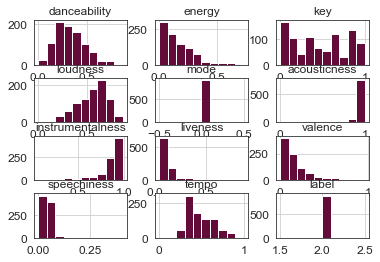

In [53]:
# visualizing the features
songs[songs['label']==2].hist()

In [55]:
# checking the cluster data
songs[songs['label']==2].head(10)

,id,embed_link,title,uri,all_artists,artists_id,artists_uri,genres,release_date,danceability,...,key,loudness,mode,acousticness,instrumentalness,liveness,valence,speechiness,tempo,label
5358,2m35eD3xOvjfUNDbtOdFo7,https://embed.spotify.com?uri=spotify%3Atrack%...,Those Quiet Hours,spotify:track:2m35eD3xOvjfUNDbtOdFo7,The Last Days of Our Past,2jRNvVCA7vd9patmMZQTlX,spotify:artist:2jRNvVCA7vd9patmMZQTlX,ambient,22/09/2021,0.0870,...,0.000000,0.464322,0,0.902,0.965,0.1360,0.0398,0.0386,0.397803,2
584,1LNqr2FALBNFX1smNJcKD2,https://embed.spotify.com?uri=spotify%3Atrack%...,Moonlight Sonata (1st Movement),spotify:track:1LNqr2FALBNFX1smNJcKD2,Betoven Collection,5BWwOqYJwIlEbS858Kmh2E,spotify:artist:5BWwOqYJwIlEbS858Kmh2E,classical music,06/03/2020,0.2620,...,0.090909,0.364166,0,0.994,0.908,0.1430,0.1140,0.0533,0.369521,2
4901,0fGNaE47Hx1SO8kEKtkGxb,https://embed.spotify.com?uri=spotify%3Atrack%...,Misty,spotify:track:0fGNaE47Hx1SO8kEKtkGxb,Stan Van Outen,6zL36bTxO4Kjtdqo04RmPu,spotify:artist:6zL36bTxO4Kjtdqo04RmPu,background jazz,14/08/2020,0.4760,...,0.727273,0.427295,0,0.994,0.952,0.0840,0.3040,0.0697,0.253678,2
2648,05UMQXFCsa9oPnLgfJHVyF,https://embed.spotify.com?uri=spotify%3Atrack%...,Ezio's Family,spotify:track:05UMQXFCsa9oPnLgfJHVyF,Jesper Kyd,3m6alJyeKYSCZ8078ttfaH,spotify:artist:3m6alJyeKYSCZ8078ttfaH,original video game soundtrack,16/11/2009,0.3750,...,0.181818,0.750411,0,0.810,0.776,0.0682,0.1060,0.0335,0.583425,2
4454,0MN3erUzrHFyq9dS3lzpoX,https://embed.spotify.com?uri=spotify%3Atrack%...,"Romeo and Juliet Fantasy Overture, TH 42",spotify:track:0MN3erUzrHFyq9dS3lzpoX,Pyotr Ilyich Tchaikovsky,3gacryguGmpmCvgPGt2CBI,spotify:artist:3gacryguGmpmCvgPGt2CBI,orchestral performance,1958,0.0939,...,1.000000,0.607744,0,0.831,0.864,0.1130,0.0389,0.0398,0.342849,2
879,4hpP90fJQFiA8jV28PuvQr,https://embed.spotify.com?uri=spotify%3Atrack%...,It Dont Mean A Thing,spotify:track:4hpP90fJQFiA8jV28PuvQr,Caravan Gypsy Swing Ensemble,0EGvsgq6T2VrDg55OKtiWG,spotify:artist:0EGvsgq6T2VrDg55OKtiWG,jazz,30/01/2010,0.7740,...,0.636364,0.781564,0,0.711,0.894,0.7090,0.8340,0.4050,0.552860,2
2346,4R9RGVFtY0YpOAoTrkjiSX,https://embed.spotify.com?uri=spotify%3Atrack%...,Expectation,spotify:track:4R9RGVFtY0YpOAoTrkjiSX,Herold Kittler,6WOPNeO16gcTIbpmXPCR56,spotify:artist:6WOPNeO16gcTIbpmXPCR56,classical music,01/01/2004,0.4760,...,0.909091,0.722824,0,0.994,0.895,0.1220,0.4040,0.0309,0.483424,2
2965,4ctHuPytDEbjlQEECaXiO5,https://embed.spotify.com?uri=spotify%3Atrack%...,The Space Travelers Lullaby,spotify:track:4ctHuPytDEbjlQEECaXiO5,Kamasi Washington,6HQYnRM4OzToCYPpVBInuU,spotify:artist:6HQYnRM4OzToCYPpVBInuU,background jazz,22/06/2018,0.1580,...,0.909091,0.812877,0,0.711,0.875,0.0671,0.1150,0.0322,0.407930,2
157,13AemnAXTNRr5JWL2h1Xfc,https://embed.spotify.com?uri=spotify%3Atrack%...,It Was Nice to Have Met You,spotify:track:13AemnAXTNRr5JWL2h1Xfc,Alexandre Desplat,71jzN72g8qWMCMkWC5p1Z0,spotify:artist:71jzN72g8qWMCMkWC5p1Z0,film score,01/01/2008,0.2870,...,0.636364,0.478218,0,0.987,0.804,0.1170,0.0389,0.0362,0.472044,2
1893,71CxH5ixNJzdh4XNLLgIkq,https://embed.spotify.com?uri=spotify%3Atrack%...,Time for Eiroa,spotify:track:71CxH5ixNJzdh4XNLLgIkq,Franz Gordon,6c9mrV72IOeJ5imCUK281g,spotify:artist:6c9mrV72IOeJ5imCUK281g,background jazz,19/11/2021,0.4040,...,0.000000,0.576499,0,0.982,0.933,0.1070,0.2460,0.0394,0.336670,2


In [56]:
# exporting the cluster into a csv file
songs[songs['label'] == 2].to_csv("Cluster 2.csv", index = False)

# Cluster # 3

array([[<AxesSubplot:title={'center':'danceability'}>,
        <AxesSubplot:title={'center':'energy'}>,
        <AxesSubplot:title={'center':'key'}>],
       [<AxesSubplot:title={'center':'loudness'}>,
        <AxesSubplot:title={'center':'mode'}>,
        <AxesSubplot:title={'center':'acousticness'}>],
       [<AxesSubplot:title={'center':'instrumentalness'}>,
        <AxesSubplot:title={'center':'liveness'}>,
        <AxesSubplot:title={'center':'valence'}>],
       [<AxesSubplot:title={'center':'speechiness'}>,
        <AxesSubplot:title={'center':'tempo'}>,
        <AxesSubplot:title={'center':'label'}>]], dtype=object)

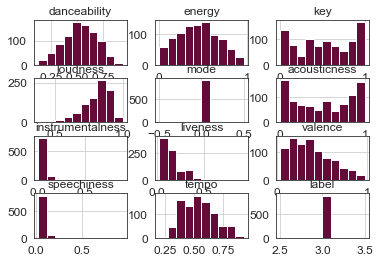

In [61]:
# visualizing the features
songs[songs['label']==3].hist()

In [57]:
# checking the cluster data
songs[songs['label']==3].head(10)

,id,embed_link,title,uri,all_artists,artists_id,artists_uri,genres,release_date,danceability,...,key,loudness,mode,acousticness,instrumentalness,liveness,valence,speechiness,tempo,label
5944,3x6PRBqhbmzlZnzuhnDIrm,https://embed.spotify.com?uri=spotify%3Atrack%...,live to die,spotify:track:3x6PRBqhbmzlZnzuhnDIrm,Zevia,6z9k3E8sR90LH0N4zyOxUu,spotify:artist:6z9k3E8sR90LH0N4zyOxUu,indie pop,11/02/2022,0.720,...,0.454545,0.778113,0,0.79400,0.000000,0.1120,0.341,0.0819,0.565269,3
1349,38uDkHVAXtK3BQIsgSiXgb,https://embed.spotify.com?uri=spotify%3Atrack%...,She Is Of The Heavens,spotify:track:38uDkHVAXtK3BQIsgSiXgb,Dario Marianelli,0s1ec6aPpRZ4DCj15w1EFg,spotify:artist:0s1ec6aPpRZ4DCj15w1EFg,film score,01/01/2012,0.459,...,0.000000,0.655764,0,0.81900,0.349000,0.1140,0.533,0.0510,0.696671,3
2727,1LKP6Gd0Jkflpk06TU7QQ6,https://embed.spotify.com?uri=spotify%3Atrack%...,Why'd You Only Call Me When You're High (violin),spotify:track:1LKP6Gd0Jkflpk06TU7QQ6,Joel Sunny,4WC54JUV6ewZOuz8Cl2Cym,spotify:artist:4WC54JUV6ewZOuz8Cl2Cym,instrumental,28/02/2021,0.247,...,0.636364,0.950951,0,0.76200,0.092600,0.3600,0.161,0.0313,0.428882,3
5749,5naar7XewEOAjOywIp6Jjq,https://embed.spotify.com?uri=spotify%3Atrack%...,Remember When,spotify:track:5naar7XewEOAjOywIp6Jjq,Wallows,0NIPkIjTV8mB795yEIiPYL,spotify:artist:0NIPkIjTV8mB795yEIiPYL,alternative rock,22/03/2019,0.504,...,1.000000,0.902747,0,0.00112,0.000424,0.7880,0.510,0.0343,0.379550,3
1864,2ZWlPOoWh0626oTaHrnl2a,https://embed.spotify.com?uri=spotify%3Atrack%...,Ivy,spotify:track:2ZWlPOoWh0626oTaHrnl2a,Frank Ocean,2h93pZq0e7k5yf4dywlkpM,spotify:artist:2h93pZq0e7k5yf4dywlkpM,hip-hop,20/08/2016,0.567,...,0.818182,0.818568,0,0.78200,0.000309,0.2480,0.452,0.0384,0.538541,3
4100,43emRhPRVRFDl3QNkISAzc,https://embed.spotify.com?uri=spotify%3Atrack%...,Black Swan (Orchestral Version),spotify:track:43emRhPRVRFDl3QNkISAzc,OMJamie,2zjE9cJ3kHlWZDCNyOwXZf,spotify:artist:2zjE9cJ3kHlWZDCNyOwXZf,pop violin,03/08/2020,0.464,...,0.181818,0.873377,0,0.88200,0.051200,0.3070,0.285,0.0431,0.340401,3
5006,5UsvkHvUfyS2J2vPuVlRC8,https://embed.spotify.com?uri=spotify%3Atrack%...,You Are My Sun,spotify:track:5UsvkHvUfyS2J2vPuVlRC8,Sun Kil Moon,4G0XDEk7RbA4BBCTs917U9,spotify:artist:4G0XDEk7RbA4BBCTs917U9,k-indie,13/11/2012,0.568,...,0.454545,0.563586,0,0.93000,0.057000,0.1080,0.259,0.0371,0.384511,3
3039,0SMKJo3fHqODpavZKFBEjn,https://embed.spotify.com?uri=spotify%3Atrack%...,Fever,spotify:track:0SMKJo3fHqODpavZKFBEjn,Kings of Convenience,41AbNVba2ccpmcc9QtOJE7,spotify:artist:41AbNVba2ccpmcc9QtOJE7,indie folk,18/06/2021,0.683,...,0.818182,0.734184,0,0.85400,0.120000,0.0843,0.715,0.0350,0.416594,3
5707,7M3HuQRRAm1QD4kftmq0bb,https://embed.spotify.com?uri=spotify%3Atrack%...,Amour plastique,spotify:track:7M3HuQRRAm1QD4kftmq0bb,Videoclub,3rp4f58JlRHkk8hpdLCer1,spotify:artist:3rp4f58JlRHkk8hpdLCer1,synth-pop,08/09/2018,0.700,...,0.545455,0.716539,0,0.76500,0.001580,0.1280,0.245,0.0345,0.555216,3
3117,0fBSs3fRoh1yJcne77fdu9,https://embed.spotify.com?uri=spotify%3Atrack%...,Video Games,spotify:track:0fBSs3fRoh1yJcne77fdu9,Lana Del Rey,00FQb4jTyendYWaN8pK0wa,spotify:artist:00FQb4jTyendYWaN8pK0wa,indie pop,01/01/2012,0.236,...,0.545455,0.818203,0,0.81100,0.000001,0.0870,0.181,0.0348,0.337147,3


In [59]:
# exporting the cluster into a csv file
songs[songs['label'] == 3].to_csv("Cluster 3.csv", index = False)

# Cluster # 4

array([[<AxesSubplot:title={'center':'danceability'}>,
        <AxesSubplot:title={'center':'energy'}>,
        <AxesSubplot:title={'center':'key'}>],
       [<AxesSubplot:title={'center':'loudness'}>,
        <AxesSubplot:title={'center':'mode'}>,
        <AxesSubplot:title={'center':'acousticness'}>],
       [<AxesSubplot:title={'center':'instrumentalness'}>,
        <AxesSubplot:title={'center':'liveness'}>,
        <AxesSubplot:title={'center':'valence'}>],
       [<AxesSubplot:title={'center':'speechiness'}>,
        <AxesSubplot:title={'center':'tempo'}>,
        <AxesSubplot:title={'center':'label'}>]], dtype=object)

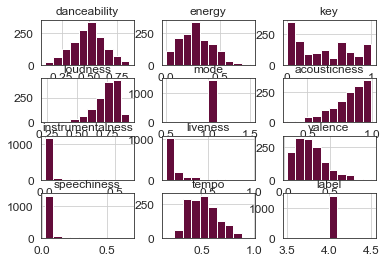

In [62]:
# visualizing the features
songs[songs['label']==4].hist()

In [58]:
# checking the cluster data
songs[songs['label']==4].head(10)

,id,embed_link,title,uri,all_artists,artists_id,artists_uri,genres,release_date,danceability,...,key,loudness,mode,acousticness,instrumentalness,liveness,valence,speechiness,tempo,label
1590,5DIVWgTeJ2fPIxaY9e7ZKn,https://embed.spotify.com?uri=spotify%3Atrack%...,I've Got A Crush On You,spotify:track:5DIVWgTeJ2fPIxaY9e7ZKn,Ella Fitzgerald,5V0MlUE1Bft0mbLlND7FJz,spotify:artist:5V0MlUE1Bft0mbLlND7FJz,jazz,11/09/1950,0.455,...,0.181818,0.715556,1,0.986,0.000000,0.1220,0.2580,0.0422,0.309193,4
5688,27viE9mjn5OpYryOrpkCmE,https://embed.spotify.com?uri=spotify%3Atrack%...,I'd Like To Walk Around in Your Mind,spotify:track:27viE9mjn5OpYryOrpkCmE,Vashti Bunyan,4chuPfKtATDZvbRLExsTp2,spotify:artist:4chuPfKtATDZvbRLExsTp2,folk,30/10/2007,0.222,...,0.000000,0.764079,1,0.931,0.000118,0.1050,0.5670,0.0461,0.808441,4
5801,68RI4I6SKm57SxjG06OYvN,https://embed.spotify.com?uri=spotify%3Atrack%...,The Wisp Sings,spotify:track:68RI4I6SKm57SxjG06OYvN,Winter Aid,15S89CUJtshT2P7WIa2M5l,spotify:artist:15S89CUJtshT2P7WIa2M5l,irish indie,11/11/2013,0.521,...,0.363636,0.592796,1,0.988,0.182000,0.0965,0.0479,0.0507,0.534227,4
3727,01TyFEZu6mHbffsVfxgrFn,https://embed.spotify.com?uri=spotify%3Atrack%...,Show Me How,spotify:track:01TyFEZu6mHbffsVfxgrFn,Men I Trust,3zmfs9cQwzJl575W1ZYXeT,spotify:artist:3zmfs9cQwzJl575W1ZYXeT,dream pop,28/02/2018,0.791,...,0.454545,0.763302,1,0.674,0.534000,0.1020,0.5440,0.0415,0.768227,4
1075,6IemSJkHc0EHmGPRnxamG5,https://embed.spotify.com?uri=spotify%3Atrack%...,Management,spotify:track:6IemSJkHc0EHmGPRnxamG5,Clairo,3l0CmX0FuQjFxr8SK7Vqag,spotify:artist:3l0CmX0FuQjFxr8SK7Vqag,bedroom pop,16/07/2021,0.268,...,0.636364,0.662553,1,0.951,0.000411,0.1660,0.2190,0.0379,0.415863,4
3987,5wzuewBsK1GdViQK4uBraa,https://embed.spotify.com?uri=spotify%3Atrack%...,Grand Piano,spotify:track:5wzuewBsK1GdViQK4uBraa,Nicki Minaj,0hCNtLu0JehylgoiP8L4Gh,spotify:artist:0hCNtLu0JehylgoiP8L4Gh,R&B,15/12/2014,0.330,...,0.363636,0.790478,1,0.889,0.000011,0.0784,0.1350,0.0307,0.593116,4
4067,7zXEY847TCQKZjk9CtiErN,https://embed.spotify.com?uri=spotify%3Atrack%...,Line Of Sight (Reprise) (feat. WYNNE & Mansion...,spotify:track:7zXEY847TCQKZjk9CtiErN,ODESZA,4qOzMSukiZoiSjPQw8Zs7s,spotify:artist:4qOzMSukiZoiSjPQw8Zs7s,electronica,30/11/2018,0.190,...,0.727273,0.881194,1,0.554,0.019400,0.1060,0.1260,0.0368,0.355946,4
4418,123zFAGx0F5ScgrLrCWGDX,https://embed.spotify.com?uri=spotify%3Atrack%...,"Variations on a Rococo Theme, Op. 33, TH 57: V...",spotify:track:123zFAGx0F5ScgrLrCWGDX,Pyotr Ilyich Tchaikovsky,1b5qV5N8eWF48rJSGIOEBx,spotify:artist:1b5qV5N8eWF48rJSGIOEBx,orchestral performance,23/09/2013,0.119,...,0.181818,0.324877,1,0.964,0.165000,0.1110,0.0388,0.0483,0.411248,4
4476,3HM4heGYevltslw27umWMh,https://embed.spotify.com?uri=spotify%3Atrack%...,"Six Pieces, Op. 51, TH 143: VI. Valse sentimen...",spotify:track:3HM4heGYevltslw27umWMh,Pyotr Ilyich Tchaikovsky,0CTjvv9ntiE7kSYxcIIEwE,spotify:artist:0CTjvv9ntiE7kSYxcIIEwE,orchestral performance,17/12/2020,0.236,...,0.090909,0.439043,1,0.954,0.018400,0.0721,0.0392,0.0519,0.473367,4
3939,6uod07ZuXsER7nvFqMANm4,https://embed.spotify.com?uri=spotify%3Atrack%...,Great White Plains,spotify:track:6uod07ZuXsER7nvFqMANm4,Nat Lefkoff,4ql6sIvagWRM8rjgOBcV4Z,spotify:artist:4ql6sIvagWRM8rjgOBcV4Z,[unknown],01/01/2017,0.521,...,0.272727,0.812694,1,0.831,0.000321,0.1070,0.3900,0.0831,0.365883,4


In [43]:
# exporting the cluster into a csv file
songs[songs['label'] == 4].to_csv("Cluster 4.csv", index = False)